In [1]:
import os
import numpy as np
import pandas as pd
import features


-----------------------------------------
[Batch import implementing on "features"]

from features import lv1_ATR
from features import lv1_Kex
from features import lv2_EWMA
from features import lv2_MA
from features import lv2_MSTD
from features import lv2_QT
from features import test_features

----------------------------------------- 



In [2]:
# %matplotlib notebook
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

#### lv2_QT test

In [3]:
df = pd.read_csv('data/bitmex_price_1hour_2020q1.csv')
df['timestamp'] = pd.to_datetime(df.timestamp)
df.set_index('timestamp', inplace=True)
df

,price_start,price_max,price_min,price_end
timestamp,,,,
2020-01-01 00:00:00,7162.5,7163.0,7153.0,7153.0
2020-01-01 01:00:00,7153.5,7210.5,7153.0,7190.5
2020-01-01 02:00:00,7190.0,7219.5,7190.0,7219.0
2020-01-01 03:00:00,7219.5,7220.0,7198.0,7201.5
2020-01-01 04:00:00,7202.0,7202.0,7191.0,7197.0
...,...,...,...,...
2020-03-31 19:00:00,6468.0,6480.0,6438.0,6469.5
2020-03-31 20:00:00,6469.0,6508.0,6459.0,6478.5
2020-03-31 21:00:00,6479.0,6492.0,6425.0,6450.0


In [4]:
df['qt_90'] = features.lv2_QT.cal(df['price_max'], 100, 0.9)
df

,price_start,price_max,price_min,price_end,qt_90
timestamp,,,,,
2020-01-01 00:00:00,7162.5,7163.0,7153.0,7153.0,NaN
2020-01-01 01:00:00,7153.5,7210.5,7153.0,7190.5,NaN
2020-01-01 02:00:00,7190.0,7219.5,7190.0,7219.0,NaN
2020-01-01 03:00:00,7219.5,7220.0,7198.0,7201.5,NaN
2020-01-01 04:00:00,7202.0,7202.0,7191.0,7197.0,NaN
...,...,...,...,...,...
2020-03-31 19:00:00,6468.0,6480.0,6438.0,6469.5,6550.50
2020-03-31 20:00:00,6469.0,6508.0,6459.0,6478.5,6526.65
2020-03-31 21:00:00,6479.0,6492.0,6425.0,6450.0,6521.80


In [5]:
df['qt_90'], df['qt_10'] = features.lv2_QT.agg_cal((df['price_max'], 100, 0.9),
                                                   (df['price_min'], 100, 0.1)
                                                  )
df

,price_start,price_max,price_min,price_end,qt_90,qt_10
timestamp,,,,,,
2020-01-01 00:00:00,7162.5,7163.0,7153.0,7153.0,NaN,NaN
2020-01-01 01:00:00,7153.5,7210.5,7153.0,7190.5,NaN,NaN
2020-01-01 02:00:00,7190.0,7219.5,7190.0,7219.0,NaN,NaN
2020-01-01 03:00:00,7219.5,7220.0,7198.0,7201.5,NaN,NaN
2020-01-01 04:00:00,7202.0,7202.0,7191.0,7197.0,NaN,NaN
...,...,...,...,...,...,...
2020-03-31 19:00:00,6468.0,6480.0,6438.0,6469.5,6550.50,6028.2
2020-03-31 20:00:00,6469.0,6508.0,6459.0,6478.5,6526.65,6028.2
2020-03-31 21:00:00,6479.0,6492.0,6425.0,6450.0,6521.80,6028.2


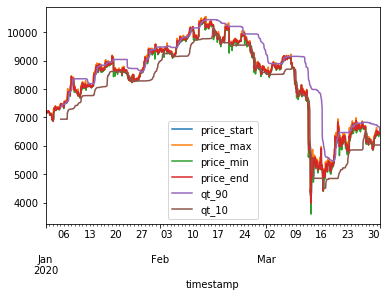

In [6]:
df.plot()

#### lv2_EWMA test

In [7]:
df = df = pd.read_csv('data/bitmex_price_1hour_2020q1.csv')
df['timestamp'] = pd.to_datetime(df.timestamp)
df.set_index('timestamp', inplace=True)
df

,price_start,price_max,price_min,price_end
timestamp,,,,
2020-01-01 00:00:00,7162.5,7163.0,7153.0,7153.0
2020-01-01 01:00:00,7153.5,7210.5,7153.0,7190.5
2020-01-01 02:00:00,7190.0,7219.5,7190.0,7219.0
2020-01-01 03:00:00,7219.5,7220.0,7198.0,7201.5
2020-01-01 04:00:00,7202.0,7202.0,7191.0,7197.0
...,...,...,...,...
2020-03-31 19:00:00,6468.0,6480.0,6438.0,6469.5
2020-03-31 20:00:00,6469.0,6508.0,6459.0,6478.5
2020-03-31 21:00:00,6479.0,6492.0,6425.0,6450.0


In [8]:
df['WEMA_100'] = features.lv2_EWMA.cal(df['price_end'], 100)
df

,price_start,price_max,price_min,price_end,WEMA_100
timestamp,,,,,
2020-01-01 00:00:00,7162.5,7163.0,7153.0,7153.0,7153.000000
2020-01-01 01:00:00,7153.5,7210.5,7153.0,7190.5,7171.843284
2020-01-01 02:00:00,7190.0,7219.5,7190.0,7219.0,7187.718854
2020-01-01 03:00:00,7219.5,7220.0,7198.0,7201.5,7191.215733
2020-01-01 04:00:00,7202.0,7202.0,7191.0,7197.0,7192.395722
...,...,...,...,...,...
2020-03-31 19:00:00,6468.0,6480.0,6438.0,6469.5,6339.577565
2020-03-31 20:00:00,6469.0,6508.0,6459.0,6478.5,6340.953034
2020-03-31 21:00:00,6479.0,6492.0,6425.0,6450.0,6342.032707


In [9]:
df['WEMA_100'], df['WEMA_200'] = features.lv2_EWMA.agg_cal((df['price_end'], 100),
                                                           (df['price_end'], 200)
                                                          )
df

,price_start,price_max,price_min,price_end,WEMA_100,WEMA_200
timestamp,,,,,,
2020-01-01 00:00:00,7162.5,7163.0,7153.0,7153.0,7153.000000,7153.000000
2020-01-01 01:00:00,7153.5,7210.5,7153.0,7190.5,7171.843284,7171.796758
2020-01-01 02:00:00,7190.0,7219.5,7190.0,7219.0,7187.718854,7187.609713
2020-01-01 03:00:00,7219.5,7220.0,7198.0,7201.5,7191.215733,7191.108307
2020-01-01 04:00:00,7202.0,7202.0,7191.0,7197.0,7192.395722,7192.298429
...,...,...,...,...,...,...
2020-03-31 19:00:00,6468.0,6480.0,6438.0,6469.5,6339.577565,6452.475820
2020-03-31 20:00:00,6469.0,6508.0,6459.0,6478.5,6340.953034,6452.605296
2020-03-31 21:00:00,6479.0,6492.0,6425.0,6450.0,6342.032707,6452.592334


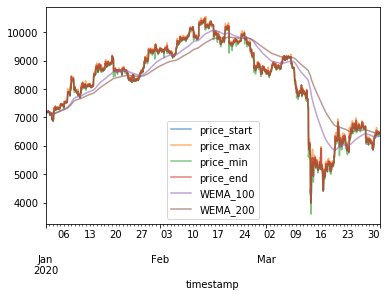

In [10]:
df.plot(alpha=0.6)

#### lv2_MA test

In [11]:
df = df = pd.read_csv('data/bitmex_price_1hour_2020q1.csv')
df['timestamp'] = pd.to_datetime(df.timestamp)
df.set_index('timestamp', inplace=True)

In [12]:
df['MA_100'] = features.lv2_MA.cal(df['price_end'], 100)
df

,price_start,price_max,price_min,price_end,MA_100
timestamp,,,,,
2020-01-01 00:00:00,7162.5,7163.0,7153.0,7153.0,NaN
2020-01-01 01:00:00,7153.5,7210.5,7153.0,7190.5,NaN
2020-01-01 02:00:00,7190.0,7219.5,7190.0,7219.0,NaN
2020-01-01 03:00:00,7219.5,7220.0,7198.0,7201.5,NaN
2020-01-01 04:00:00,7202.0,7202.0,7191.0,7197.0,NaN
...,...,...,...,...,...
2020-03-31 19:00:00,6468.0,6480.0,6438.0,6469.5,6280.740
2020-03-31 20:00:00,6469.0,6508.0,6459.0,6478.5,6279.070
2020-03-31 21:00:00,6479.0,6492.0,6425.0,6450.0,6277.115


In [13]:
df['MA_100'], df['MA_200'] = features.lv2_MA.agg_cal((df['price_end'], 100),
                                                     (df['price_end'], 200)
                                                    )
df

,price_start,price_max,price_min,price_end,MA_100,MA_200
timestamp,,,,,,
2020-01-01 00:00:00,7162.5,7163.0,7153.0,7153.0,NaN,NaN
2020-01-01 01:00:00,7153.5,7210.5,7153.0,7190.5,NaN,NaN
2020-01-01 02:00:00,7190.0,7219.5,7190.0,7219.0,NaN,NaN
2020-01-01 03:00:00,7219.5,7220.0,7198.0,7201.5,NaN,NaN
2020-01-01 04:00:00,7202.0,7202.0,7191.0,7197.0,NaN,NaN
...,...,...,...,...,...,...
2020-03-31 19:00:00,6468.0,6480.0,6438.0,6469.5,6280.740,6455.5975
2020-03-31 20:00:00,6469.0,6508.0,6459.0,6478.5,6279.070,6456.2750
2020-03-31 21:00:00,6479.0,6492.0,6425.0,6450.0,6277.115,6457.0250


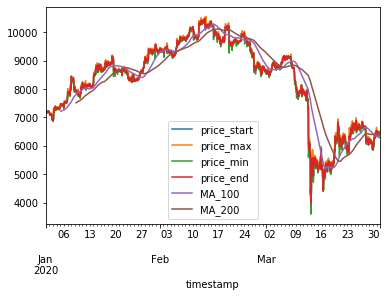

In [14]:
df.plot()

#### lv2_MSTD test

In [15]:
df = df = pd.read_csv('data/bitmex_price_1hour_2020q1.csv')
df['timestamp'] = pd.to_datetime(df.timestamp)
df.set_index('timestamp', inplace=True)

In [16]:
df['std_100'] = features.lv2_MSTD.cal(df['price_end'], 100)
df

,price_start,price_max,price_min,price_end,std_100
timestamp,,,,,
2020-01-01 00:00:00,7162.5,7163.0,7153.0,7153.0,NaN
2020-01-01 01:00:00,7153.5,7210.5,7153.0,7190.5,NaN
2020-01-01 02:00:00,7190.0,7219.5,7190.0,7219.0,NaN
2020-01-01 03:00:00,7219.5,7220.0,7198.0,7201.5,NaN
2020-01-01 04:00:00,7202.0,7202.0,7191.0,7197.0,NaN
...,...,...,...,...,...
2020-03-31 19:00:00,6468.0,6480.0,6438.0,6469.5,191.146270
2020-03-31 20:00:00,6469.0,6508.0,6459.0,6478.5,188.640351
2020-03-31 21:00:00,6479.0,6492.0,6425.0,6450.0,185.796047


In [17]:
df['std_100'], df['std_200'] = features.lv2_MSTD.agg_cal((df['price_end'], 100),
                                                         (df['price_end'], 200)
                                                        )
df

,price_start,price_max,price_min,price_end,std_100,std_200
timestamp,,,,,,
2020-01-01 00:00:00,7162.5,7163.0,7153.0,7153.0,NaN,NaN
2020-01-01 01:00:00,7153.5,7210.5,7153.0,7190.5,NaN,NaN
2020-01-01 02:00:00,7190.0,7219.5,7190.0,7219.0,NaN,NaN
2020-01-01 03:00:00,7219.5,7220.0,7198.0,7201.5,NaN,NaN
2020-01-01 04:00:00,7202.0,7202.0,7191.0,7197.0,NaN,NaN
...,...,...,...,...,...,...
2020-03-31 19:00:00,6468.0,6480.0,6438.0,6469.5,191.146270,239.532851
2020-03-31 20:00:00,6469.0,6508.0,6459.0,6478.5,188.640351,239.404368
2020-03-31 21:00:00,6479.0,6492.0,6425.0,6450.0,185.796047,239.147154


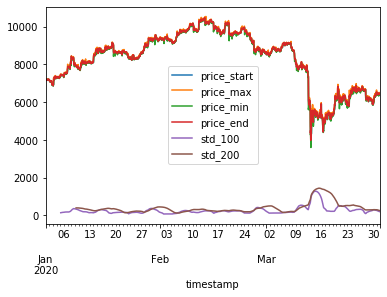

In [18]:
df.plot()

#### lv1_Kex test

In [19]:
df = df = pd.read_csv('data/bitmex_price_1hour_2020q1.csv')
df

,timestamp,price_start,price_max,price_min,price_end
0,2020-01-01 00:00:00,7162.5,7163.0,7153.0,7153.0
1,2020-01-01 01:00:00,7153.5,7210.5,7153.0,7190.5
2,2020-01-01 02:00:00,7190.0,7219.5,7190.0,7219.0
3,2020-01-01 03:00:00,7219.5,7220.0,7198.0,7201.5
4,2020-01-01 04:00:00,7202.0,7202.0,7191.0,7197.0
...,...,...,...,...,...
2179,2020-03-31 19:00:00,6468.0,6480.0,6438.0,6469.5
2180,2020-03-31 20:00:00,6469.0,6508.0,6459.0,6478.5
2181,2020-03-31 21:00:00,6479.0,6492.0,6425.0,6450.0
2182,2020-03-31 22:00:00,6450.5,6455.0,6424.0,6440.5


In [20]:
features.lv1_Kex.cal(df, 
                     'price_start', 
                     'price_end', 
                     'price_max', 
                     'price_min'
                    )

,timestamp,price_start,price_max,price_min,price_end,K_color,K_move,K_move_rate,K_len_all,K_len_body,K_len_up,K_len_down,K_ratio_bar,K_ratio_up,K_ratio_down
0,2020-01-01 00:00:00,7162.5,7163.0,7153.0,7153.0,-1,-9.5,-0.132635,10.0,9.5,0.5,0.0,0.132635,0.006981,0.000000
1,2020-01-01 01:00:00,7153.5,7210.5,7153.0,7190.5,1,37.0,0.517229,57.5,37.0,20.0,0.5,0.517229,0.279583,0.006990
2,2020-01-01 02:00:00,7190.0,7219.5,7190.0,7219.0,1,29.0,0.403338,29.5,29.0,0.5,0.0,0.403338,0.006954,0.000000
3,2020-01-01 03:00:00,7219.5,7220.0,7198.0,7201.5,-1,-18.0,-0.249325,22.0,18.0,0.5,3.5,0.249325,0.006926,0.048480
4,2020-01-01 04:00:00,7202.0,7202.0,7191.0,7197.0,-1,-5.0,-0.069425,11.0,5.0,0.0,6.0,0.069425,0.000000,0.083310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,2020-03-31 19:00:00,6468.0,6480.0,6438.0,6469.5,1,1.5,0.023191,42.0,1.5,10.5,30.0,0.023191,0.162338,0.463822
2180,2020-03-31 20:00:00,6469.0,6508.0,6459.0,6478.5,1,9.5,0.146854,49.0,9.5,29.5,10.0,0.146854,0.456021,0.154583
2181,2020-03-31 21:00:00,6479.0,6492.0,6425.0,6450.0,-1,-29.0,-0.447600,67.0,29.0,13.0,25.0,0.447600,0.200648,0.385862
2182,2020-03-31 22:00:00,6450.5,6455.0,6424.0,6440.5,-1,-10.0,-0.155027,31.0,10.0,4.5,16.5,0.155027,0.069762,0.255794


#### lv1_ATR test

In [21]:
df = pd.read_csv('data/bitmex_price_1hour_2020q1.csv')
df

,timestamp,price_start,price_max,price_min,price_end
0,2020-01-01 00:00:00,7162.5,7163.0,7153.0,7153.0
1,2020-01-01 01:00:00,7153.5,7210.5,7153.0,7190.5
2,2020-01-01 02:00:00,7190.0,7219.5,7190.0,7219.0
3,2020-01-01 03:00:00,7219.5,7220.0,7198.0,7201.5
4,2020-01-01 04:00:00,7202.0,7202.0,7191.0,7197.0
...,...,...,...,...,...
2179,2020-03-31 19:00:00,6468.0,6480.0,6438.0,6469.5
2180,2020-03-31 20:00:00,6469.0,6508.0,6459.0,6478.5
2181,2020-03-31 21:00:00,6479.0,6492.0,6425.0,6450.0
2182,2020-03-31 22:00:00,6450.5,6455.0,6424.0,6440.5


In [22]:
df['atr'] = features.lv1_ATR.cal(df, 
                     'price_start', 
                     'price_end', 
                     'price_min', 
                     'price_min')
df

,timestamp,price_start,price_max,price_min,price_end,atr
0,2020-01-01 00:00:00,7162.5,7163.0,7153.0,7153.0,0.132635
1,2020-01-01 01:00:00,7153.5,7210.5,7153.0,7190.5,0.000000
2,2020-01-01 02:00:00,7190.0,7219.5,7190.0,7219.0,0.006954
3,2020-01-01 03:00:00,7219.5,7220.0,7198.0,7201.5,0.290879
4,2020-01-01 04:00:00,7202.0,7202.0,7191.0,7197.0,0.145793
...,...,...,...,...,...,...
2179,2020-03-31 19:00:00,6468.0,6480.0,6438.0,6469.5,0.456092
2180,2020-03-31 20:00:00,6469.0,6508.0,6459.0,6478.5,0.162313
2181,2020-03-31 21:00:00,6479.0,6492.0,6425.0,6450.0,0.825745
2182,2020-03-31 22:00:00,6450.5,6455.0,6424.0,6440.5,0.403070


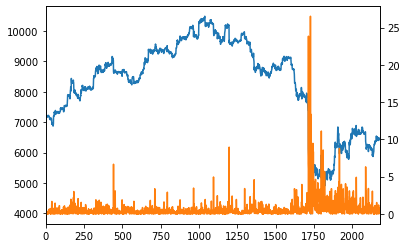

In [23]:
df.price_end.plot()
df.atr.plot(secondary_y=True)